# Regression example

We are going to work on a classification problem. The code below is taken, and in part modified, from Chapter 2 of [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/). The original code can be downloaded from its [Git repository](https://github.com/ageron/handson-ml2).

## The California Housing Prices dataset

We will work with a publicly abailable California Hoousing Prices dataset from the StatLib repository. This dataset can be loaded directly within scikit-learn. We will learn how to load datasets from file or URLs in a future lecture.

A description of the California Hoousing Prices dataset can be found [here](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). It contains the following attributes:
- *MedInc*: median income in block
- *HouseAge*: median house age in block
- *AveRooms*: average number of rooms
- *AveBedrms*: average number of bedrooms
- *Population*: block population
- *AveOccup*: average house occupancy
- *Latitude*: house block latitude
- *Longitude*: house block longitude
- ***MedHouseVal***: average house value in units of $100,000 (this is our *Target*)

## Import dataset

Because this is one of the example datastes, scikit learn provides a function to load it. The resul is a scikit learn "Bunch" object that contains information about the dataset un different fields. To simulate what you will get more realistically when you load your own data, we will convert the Bunch object to a Pandas Data Frame, which you can think of as a spreadsheed.

In [1]:
# Import libraries in Python
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

#dd = fetch_california_housing() # Load the dataset from scikitlearn; dd is a Bunch object
#data = pd.DataFrame(dd.data, columns=dd.feature_names) # convert dataset to Pandas DataFrame
#data.insert(0,"median_house_value", dd.target*100000) # Insert target of regression as first columns

dd = fetch_california_housing(as_frame=True) # Load the dataset from scikitlearn; dd is a Bunch object
data = dd.frame # extract DataFrame from Bunch object

## Explore dataset

You can now start exploring your data by using Pandas function and  functions provided by other Python libraries (e.g. matplotlib).

In [2]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Plot the histogram of all columns (features) in the dataset.

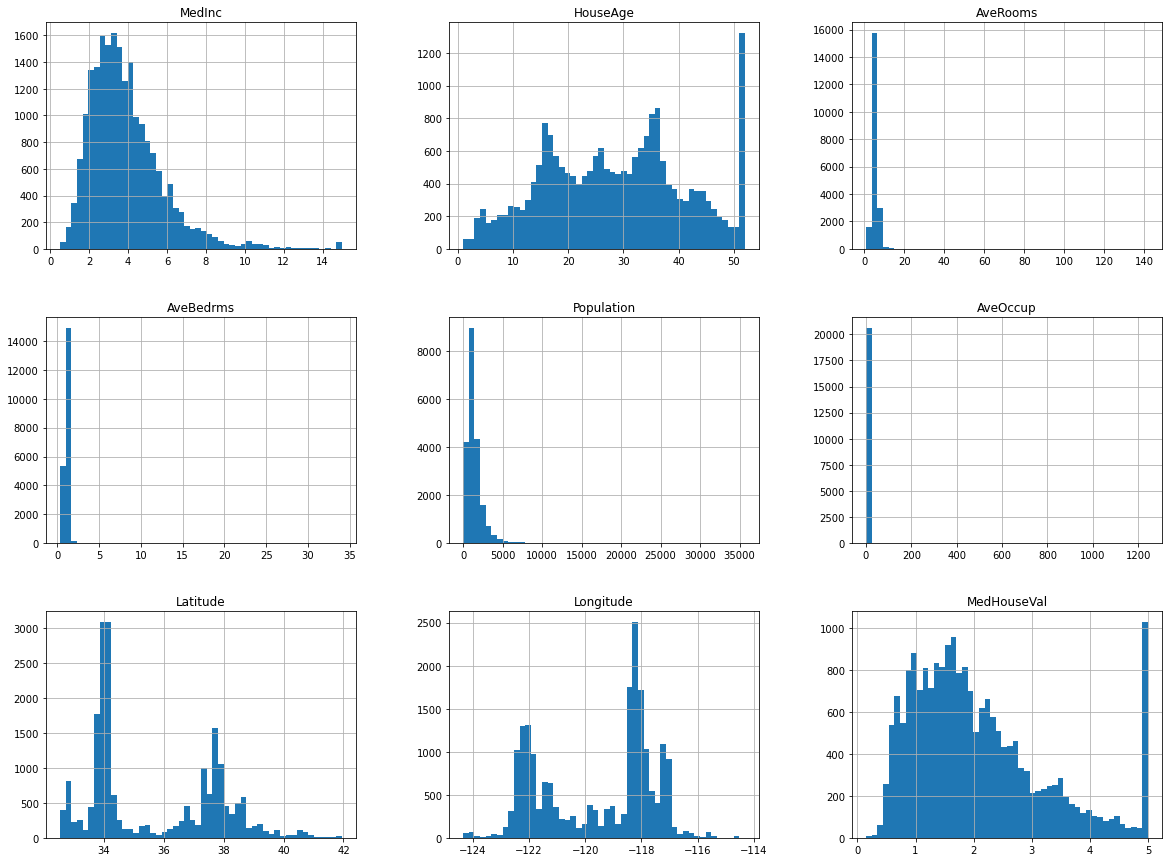

In [5]:
import matplotlib.pyplot as plt # for "clean" inline ploting
data.hist(bins=50, figsize=(20,15))
plt.show() # for "clean" inline ploting

## Create a Training/Test dataset split

The first thing you need to do to train an ML model is to separate your dataset into a Traning set and a Test set. Scikit-learn provides the `train_test_split` function to do this. You need to decide on the ratio of elements in the Traning and Test sets. In this example we will use an 80:20 split.

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

We now look at the histograms in the Traning and Test sets to make sure they are both representative of the original set.

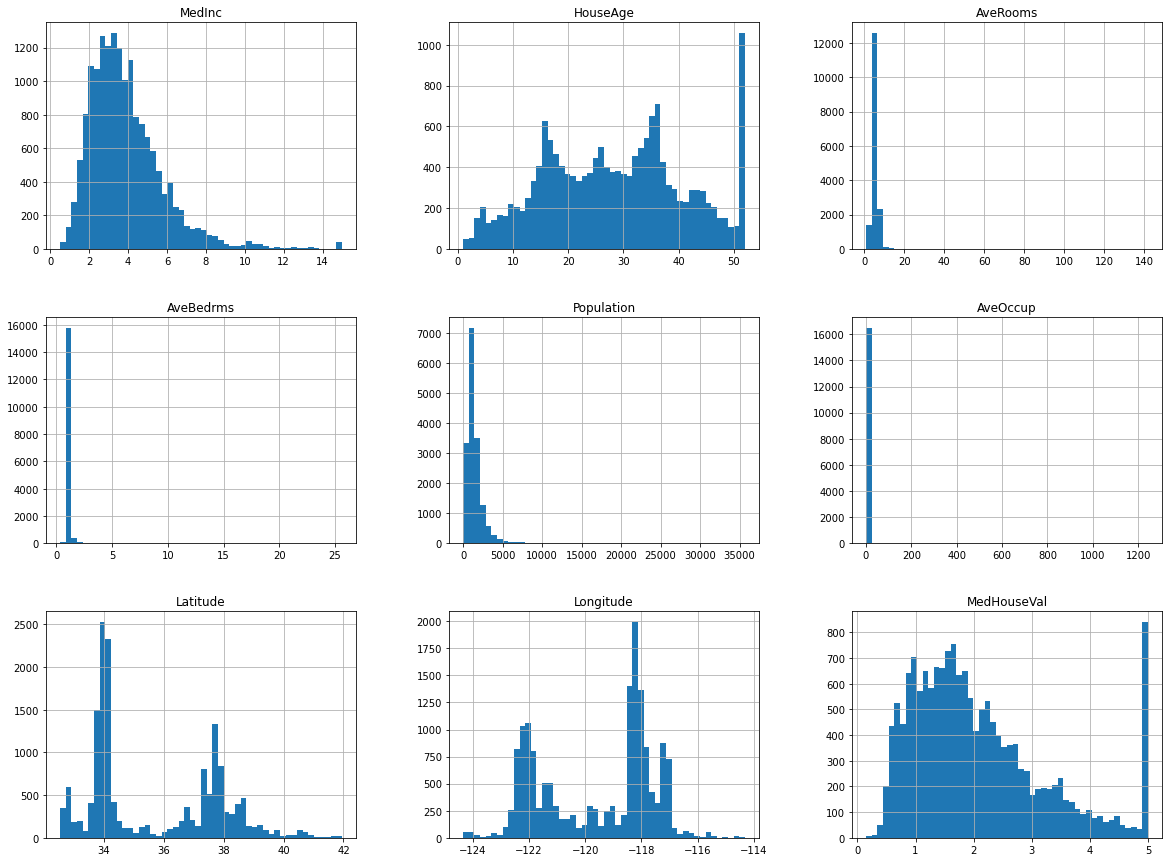

In [7]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

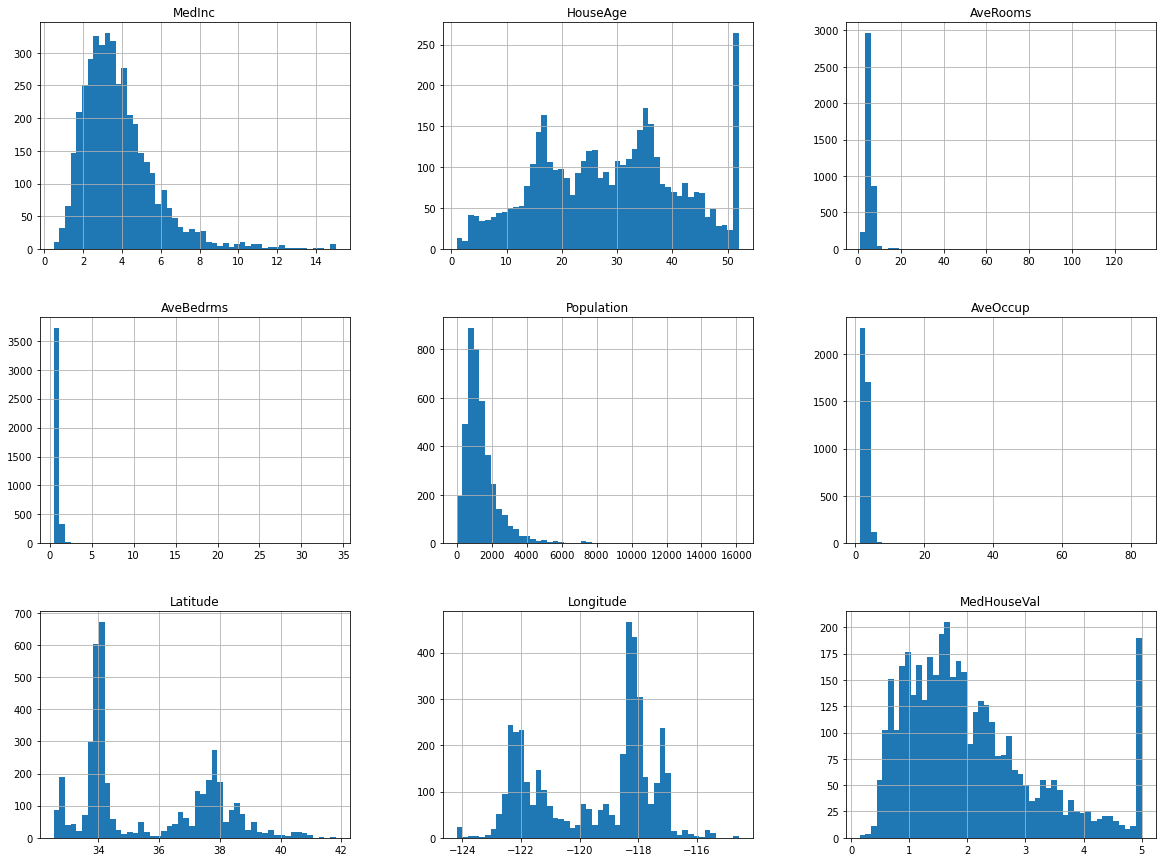

In [8]:
test_set.hist(bins=50, figsize=(20,15))
plt.show()

The histogram look pretty similar, so we should be OK. There are situations though in which you want to make sure that all levels/values are represented in the right proportion as the appear in the original data. Scikit-learn provide the `StratifiedShuffleSplit` function to fdo this (see textbook).

All data are in a single Pandas table, but most ML algorithms want you to split the independent variables/features, from the dependent variables/labels. We will do it here:

In [9]:
X_train = train_set.drop("MedHouseVal", axis=1)
y_train = train_set["MedHouseVal"].copy()

In [10]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [11]:
y_train.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64

## Linear regression

We will apply a simple linear regression to the data.

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Let's try the full preprocessing pipeline on a few training instances


In [13]:
some_X = X_train.iloc[:5]
some_y = y_train.iloc[:5]

print("Predictions:", lin_reg.predict(some_X))

Predictions: [1.93725845 2.48910616 2.64735483 1.56589492 1.61312839]


Compare against the actual values:

In [14]:
print("True values:", list(some_y))

True values: [1.03, 3.821, 1.726, 0.934, 0.965]


### Evaluating performance of linear regression

The next step is to evaluate our model. How well does it perform? We can use the Test set to evaluate its performance. With regression we can use different types of metrics such as the *root mean squared error (RMSE)* or the *mean absolut error (MAE)*.

In [15]:
X_test = test_set.drop("MedHouseVal", axis=1)
y_test = test_set["MedHouseVal"].copy()

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions_train = lin_reg.predict(X_train)
predictions_test = lin_reg.predict(X_test)

# Compute RMSE on the training and test set
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print("Training set RMSE = ", rmse_train)
print("Test set RMSE = ", rmse_test)

print(" ")
# Compute MAE on the training and test set
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)

print("Training set MAE = ", mae_train)
print("Test set MAE = ", mae_test)

Training set RMSE =  0.7196757085831575
Test set RMSE =  0.7455813830127763
 
Training set MAE =  0.5286283596581924
Test set MAE =  0.5332001304956556


## Decision Tree

Let's try a different model, a Decision Tree.

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Evaluating performance of Decision Tree

In [18]:
predictions_train = tree_reg.predict(X_train)
predictions_test = tree_reg.predict(X_test)

# Compute RMSE on the training and test set
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print("Training set RMSE = ", rmse_train)
print("Test set RMSE = ", rmse_test)

print(" ")
# Compute MAE on the training and test set
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)


print("Training set MAE = ", mae_train)
print("Test set MAE = ", mae_test)

Training set RMSE =  3.0584875752102123e-16
Test set RMSE =  0.7056736565432687
 
Training set MAE =  4.35697989315105e-17
Test set MAE =  0.45543598837209304


## Cross Validation

A better way to evaluate and compare across models is to use cross-validation. With cross-validation we split the traning sets into K folds and generate K training sets where each time one fold is left out and used as the Test set. Training then occurs on each of the K folds and evaluation is done on the corresponind Test set.

### Linear Regression

In [19]:
from sklearn.model_selection import cross_val_score

scores = np.sqrt(-cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
print("Scores:", scores)
pd.Series(scores).describe()

Scores: [0.68492376 0.75513759 0.72296609 0.69512578 0.73691612 0.70625758
 0.68887227 0.73677179 0.73573577 0.74201925]


count    10.000000
mean      0.720473
std       0.024828
min       0.684924
25%       0.697909
50%       0.729351
75%       0.736880
max       0.755138
dtype: float64

### Decision Tree

In [20]:
scores = np.sqrt(-cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
print("Scores:", scores)
pd.Series(scores).describe()

Scores: [0.72129894 0.74989194 0.69080813 0.73787062 0.71623233 0.69025932
 0.70598123 0.75358186 0.7432831  0.75793138]


count    10.000000
mean      0.726714
std       0.025429
min       0.690259
25%       0.708544
50%       0.729585
75%       0.748240
max       0.757931
dtype: float64

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [22]:
scores = np.sqrt(-cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
print("Scores:", scores)
pd.Series(scores).describe()

Scores: [0.48410549 0.52034486 0.50082901 0.5221447  0.52120136 0.48324897
 0.4869273  0.51565877 0.50346522 0.52112475]


count    10.000000
mean      0.505905
std       0.016375
min       0.483249
25%       0.490403
50%       0.509562
75%       0.520930
max       0.522145
dtype: float64

In [23]:
forest_reg.fit(X_train, y_train)

predictions_train = forest_reg.predict(X_train)
predictions_test = forest_reg.predict(X_test)

# Compute RMSE on the training and test set
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print("Training set RMSE = ", rmse_train)
print("Test set RMSE = ", rmse_test)

Training set RMSE =  0.18798014206480804
Test set RMSE =  0.5067477004365527


## Comparing the three models' performance

<AxesSubplot:>

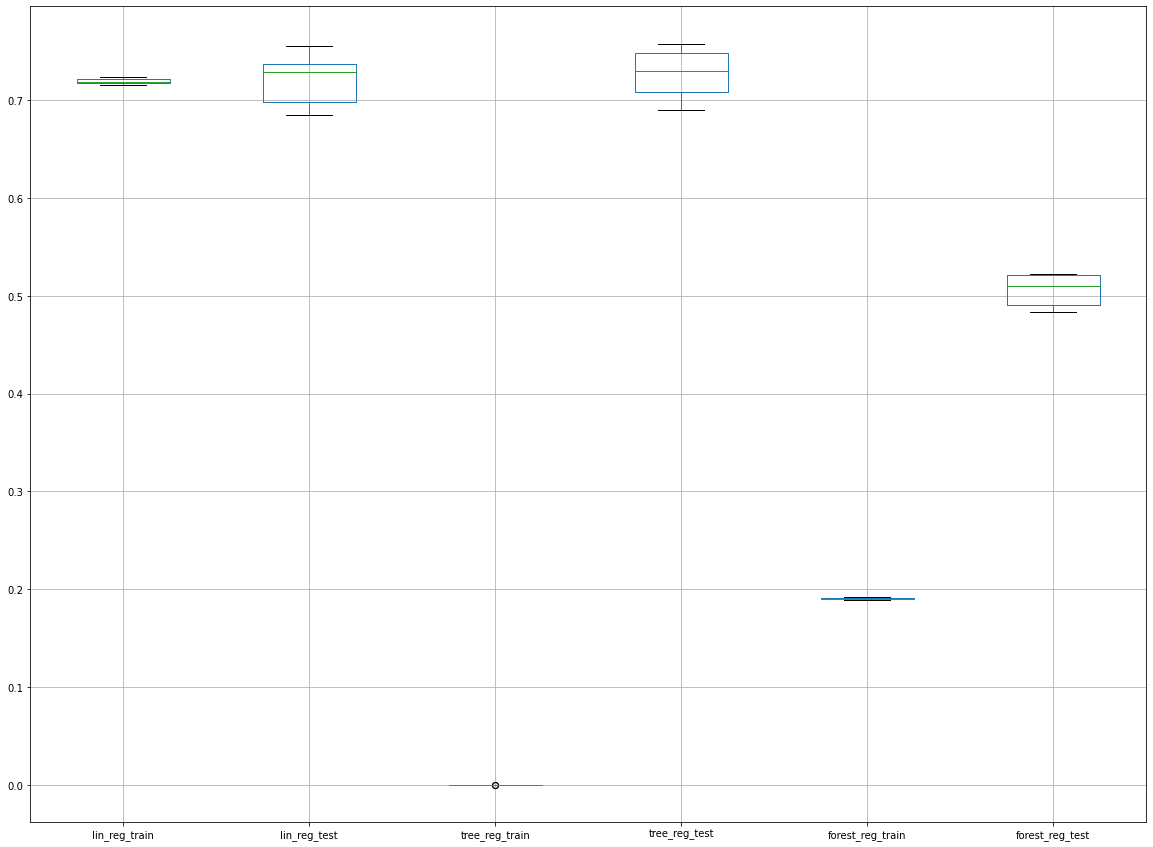

In [24]:
from sklearn.model_selection import cross_validate

# Linear Regression
cv_results = cross_validate(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
d = {'lin_reg_train': np.sqrt(-cv_results['train_score']), 'lin_reg_test': np.sqrt(-cv_results['test_score'])}
cv_scores = pd.DataFrame(data=d)

# Decision Tree
cv_results = cross_validate(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
cv_scores['tree_reg_train'] = np.sqrt(-cv_results['train_score'])
cv_scores['tree_reg_test'] = np.sqrt(-cv_results['test_score'])

# Random Forest
cv_results = cross_validate(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
cv_scores['forest_reg_train'] = np.sqrt(-cv_results['train_score'])
cv_scores['forest_reg_test'] = np.sqrt(-cv_results['test_score'])
cv_scores

cv_scores.boxplot(figsize=(20,15))